In [156]:
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
before_may_raw = pd.read_csv('before_may_raw.csv', index_col= 0)
before_may_raw
before_may = before_may_raw.copy()

In [158]:
# Examine Targeting learners campaign only -- 4473 rows 
before_may = before_may[before_may['campaign'] == 'Targeting Learners']
# drop campaign column
before_may.drop('campaign', axis = 1, inplace = True)

In [159]:
# Change metrics to interger
cols = before_may.iloc[:, 3:].columns
before_may[cols] = before_may[cols].astype('int')

# Check 
before_may.dtypes

keyword             object
country             object
goal4Completions     int64
goal5Completions     int64
goal6Completions     int64
goal7Completions     int64
goal8Completions     int64
sessions             int64
bounces              int64
dtype: object

# DF with keywords only

In [160]:
keyword_df = before_may.copy()

# sum all data across countries and campaigns by keyword only
keyword_df = keyword_df.groupby(['keyword']).sum().reset_index()

In [161]:
# # Calculae conversion rate
# keyword_df['goal4ConversionRate'] = keyword_df['goal4Completions'] / keyword_df['sessions']
# keyword_df['goal5ConversionRate'] = keyword_df['goal5Completions'] / keyword_df['sessions']
# keyword_df['goal6ConversionRate'] = keyword_df['goal6Completions'] / keyword_df['sessions']
# keyword_df['goal7ConversionRate'] = keyword_df['goal7Completions'] / keyword_df['sessions']
# keyword_df['goal8ConversionRate'] = keyword_df['goal8Completions'] / keyword_df['sessions']
# keyword_df['totalConversionRate'] = (keyword_df['goal4ConversionRate'] + 
#                                      keyword_df['goal5ConversionRate'] +
#                                      keyword_df['goal6ConversionRate'] +
#                                      keyword_df['goal7ConversionRate'] +
#                                      keyword_df['goal8ConversionRate']) / 5

In [162]:
keyword_df.keyword.unique()

array(['+fraction +math', '+how +to +simplify +fractions',
       '+math +fractions', 'Learn fractions', 'Math help fractions',
       'Math ratios games', 'Online ratios games', 'Ratio math',
       'Ratios and proportions', 'Ratios for kids',
       'activities to teach ratios', 'add negative numbers',
       'basic fractions', 'divide negative numbers',
       'equivalent fractions', 'fraction games',
       'fraction games for kids', 'fraction math', 'fractions for kids',
       'fractions lesson', 'fractions to decimals', 'free math help',
       'help with fractions', 'how to do fractions',
       'how to solve fractions', 'how to solve ratio',
       'how to solve ratio questions', 'how to teach fractions',
       'interactive fraction games', 'learn ratios', 'learn to code game',
       'learning websites', 'math fractions', 'math fractions games',
       'math lessons', 'maths fractions', 'maths lessons',
       'maths online free', 'multiply negative numbers',
       'negativ

In [163]:
# Add all keywords to list keys
keys = []
pd.Series(keyword_df.keyword.unique()).apply(lambda x: keys.append(x))
keys[:2]

['+fraction +math', '+how +to +simplify +fractions']

In [164]:
# loop to extract unique words in keywords
'''
INPUT:

OUTPUT: set of unique words in keywords'''
set_unique_key = set() 
test = keys.copy()
for keyword in test:
    keyword = keyword.split(' ')
    for word in keyword:
        word = re.search('[a-zA-z]+', word).group(0)
        word = word.lower()
        set_unique_key.add(word)

In [165]:
# Convert to string to use remove stop word function
string = ' '.join(str(e) for e in set_unique_key)
string

'a rules games equivalent maths questions websites decimals programing proportion to answers learn ratio by negative positive problems times multiply add lesson help proportions and fractions code teaching solve interactive plus for how online math subtract website that with kids game free divided in practice lessons divide fraction ratios activities minus simplify do learning teach basic numbers'

In [166]:
text = string
text_tokens = word_tokenize(text)

tokens = [word for word in text_tokens if not word in stopwords.words()]

lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens] 

print(tokens)
print(len(tokens))

['rule', 'game', 'equivalent', 'math', 'question', 'website', 'decimal', 'programing', 'proportion', 'answer', 'learn', 'ratio', 'negative', 'positive', 'problem', 'time', 'multiply', 'add', 'lesson', 'help', 'proportion', 'fraction', 'code', 'teaching', 'solve', 'interactive', 'plus', 'online', 'math', 'subtract', 'website', 'kid', 'game', 'free', 'divided', 'practice', 'lesson', 'divide', 'fraction', 'ratio', 'activity', 'minus', 'simplify', 'learning', 'teach', 'basic', 'number']
47


In [167]:
tokens = ['teach' if x=='teaching' else x for x in tokens]

In [168]:
import numpy as np
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)
    
tokens = list(unique(tokens))

learning problem question lesson
teach
math rule solve answer
ratio proportion decimal
positive negative
multiply divide
plus subtract minus
code programing
game kid activity
basic 
time
simplify

In [169]:
keyword_df

,keyword,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces
0,+fraction +math,1,100,113,84,18,349,201
1,+how +to +simplify +fractions,0,11,11,8,1,42,26
2,+math +fractions,0,128,136,108,27,436,235
3,Learn fractions,0,697,841,628,144,2584,1408
4,Math help fractions,0,140,231,140,19,736,443
...,...,...,...,...,...,...,...,...
57,subtract negative numbers,0,525,756,474,14,2751,1710
58,teach ratios,0,0,14,10,0,27,9
59,teaching fractions,0,494,541,468,96,1403,648
60,teaching kids fractions,0,158,132,130,26,356,149


In [170]:
df = keyword_df.copy()
df.head()

,keyword,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces
0,+fraction +math,1,100,113,84,18,349,201
1,+how +to +simplify +fractions,0,11,11,8,1,42,26
2,+math +fractions,0,128,136,108,27,436,235
3,Learn fractions,0,697,841,628,144,2584,1408
4,Math help fractions,0,140,231,140,19,736,443


In [171]:
# lemmatize 
df['keyword'] = df['keyword'].str.replace('[^\w\s]','')
df['keyword'] = df['keyword'].str.lower().str.split()

stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
df['keyword'] = df['keyword'].apply(lambda x: [item for item in x if item not in stop])
df['keyword'] = df['keyword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df

,keyword,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces
0,"[fraction, math]",1,100,113,84,18,349,201
1,"[simplify, fraction]",0,11,11,8,1,42,26
2,"[math, fraction]",0,128,136,108,27,436,235
3,"[learn, fraction]",0,697,841,628,144,2584,1408
4,"[math, help, fraction]",0,140,231,140,19,736,443
...,...,...,...,...,...,...,...,...
57,"[subtract, negative, number]",0,525,756,474,14,2751,1710
58,"[teach, ratio]",0,0,14,10,0,27,9
59,"[teaching, fraction]",0,494,541,468,96,1403,648
60,"[teaching, kid, fraction]",0,158,132,130,26,356,149


In [172]:
# Create columns name in form 'kw_colname'
kw_col_names = []
for item in tokens:
    item = 'kw_' + item
    kw_col_names.append(item)

    
# Create table to match word in keywords 
table = []
for kw in df.keyword:
    row = []
    row.append(kw)
    for word in tokens:
        if word in kw:
            row.append(1)
        else:
            row.append(0)
    table.append(row)

header = ['keyword'] + kw_col_names 
keyword_table = pd.DataFrame(table, columns=header)
            
keyword_table.shape

(62, 40)

In [173]:
keyword_table = keyword_table.drop('keyword', axis = 1)

In [174]:
keyword_table.shape

(62, 39)

In [175]:
keyword_table['kw_activity'].sum()

1

In [176]:
# Join df and keyword_table --> keyword_df
keyword_df = pd.concat([keyword_df.reset_index(),keyword_table.reset_index()], axis = 1)
keyword_df.drop(['index'], axis = 1, inplace = True)


In [177]:
keyword_df.shape

(62, 47)

In [178]:
keyword_df.columns

Index(['keyword', 'goal4Completions', 'goal5Completions', 'goal6Completions',
       'goal7Completions', 'goal8Completions', 'sessions', 'bounces',
       'kw_activity', 'kw_add', 'kw_answer', 'kw_basic', 'kw_code',
       'kw_decimal', 'kw_divide', 'kw_divided', 'kw_equivalent', 'kw_fraction',
       'kw_free', 'kw_game', 'kw_help', 'kw_interactive', 'kw_kid', 'kw_learn',
       'kw_learning', 'kw_lesson', 'kw_math', 'kw_minus', 'kw_multiply',
       'kw_negative', 'kw_number', 'kw_online', 'kw_plus', 'kw_positive',
       'kw_practice', 'kw_problem', 'kw_programing', 'kw_proportion',
       'kw_question', 'kw_ratio', 'kw_rule', 'kw_simplify', 'kw_solve',
       'kw_subtract', 'kw_teach', 'kw_time', 'kw_website'],
      dtype='object')

In [179]:
keyword_df.sample(5)

,keyword,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,kw_activity,kw_add,...,kw_proportion,kw_question,kw_ratio,kw_rule,kw_simplify,kw_solve,kw_subtract,kw_teach,kw_time,kw_website
3,Learn fractions,0,697,841,628,144,2584,1408,0,0,...,0,0,0,0,0,0,0,0,0,0
25,how to solve ratio,0,294,431,293,23,1406,827,0,0,...,0,0,1,0,0,1,0,0,0,0
27,how to teach fractions,0,102,115,101,21,287,134,0,0,...,0,0,0,0,0,0,0,1,0,0
7,Ratio math,0,171,157,106,5,604,324,0,0,...,0,0,1,0,0,0,0,0,0,0
51,ratio games,0,225,268,195,26,651,308,0,0,...,0,0,1,0,0,0,0,0,0,0


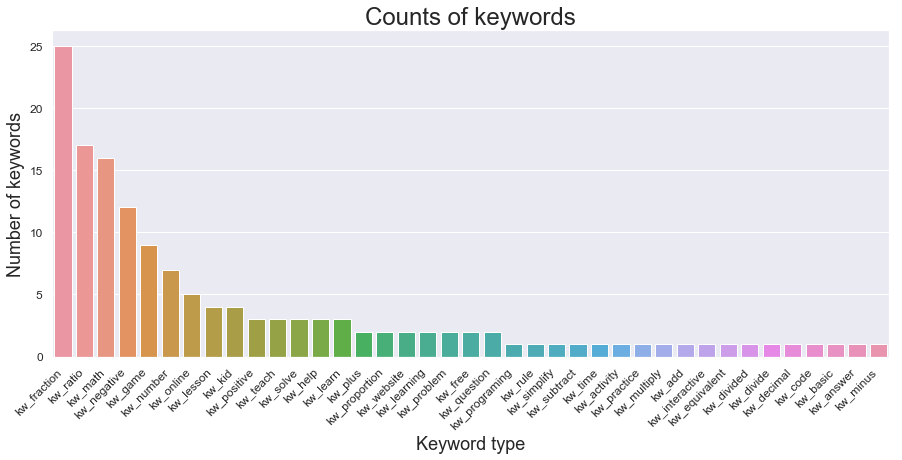

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = [col for col in keyword_df.columns if 'kw_' in col]
sns.set(font_scale = 2)
plt.figure(figsize=(15,6))

plot_order = keyword_df.iloc[:,8:].sum().reset_index().sort_values(0, ascending = False)


ax= sns.barplot(categories, keyword_df.iloc[:,8:].sum().values, order = plot_order['index'])

plt.title("Counts of keywords", fontsize=24)
plt.ylabel('Number of keywords', fontsize=18)
plt.xlabel('Keyword type', fontsize=18)

#adding the text labels
# rects = ax.patches
# labels = keyword_df.iloc[:,16:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
ax.tick_params(labelsize=12)

plt.show()

## Explore by CR

In [181]:
long_df = keyword_df.iloc[:,1:]
long_df.columns

Index(['goal4Completions', 'goal5Completions', 'goal6Completions',
       'goal7Completions', 'goal8Completions', 'sessions', 'bounces',
       'kw_activity', 'kw_add', 'kw_answer', 'kw_basic', 'kw_code',
       'kw_decimal', 'kw_divide', 'kw_divided', 'kw_equivalent', 'kw_fraction',
       'kw_free', 'kw_game', 'kw_help', 'kw_interactive', 'kw_kid', 'kw_learn',
       'kw_learning', 'kw_lesson', 'kw_math', 'kw_minus', 'kw_multiply',
       'kw_negative', 'kw_number', 'kw_online', 'kw_plus', 'kw_positive',
       'kw_practice', 'kw_problem', 'kw_programing', 'kw_proportion',
       'kw_question', 'kw_ratio', 'kw_rule', 'kw_simplify', 'kw_solve',
       'kw_subtract', 'kw_teach', 'kw_time', 'kw_website'],
      dtype='object')

In [182]:
long_df = long_df.melt(id_vars=long_df[[col for col in long_df.columns if 'kw_' not in col]], 
                      var_name = 'kw_type')

In [183]:
long_df

,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,kw_type,value
0,1,100,113,84,18,349,201,kw_activity,0
1,0,11,11,8,1,42,26,kw_activity,0
2,0,128,136,108,27,436,235,kw_activity,0
3,0,697,841,628,144,2584,1408,kw_activity,0
4,0,140,231,140,19,736,443,kw_activity,0
...,...,...,...,...,...,...,...,...,...
2413,0,525,756,474,14,2751,1710,kw_website,0
2414,0,0,14,10,0,27,9,kw_website,0
2415,0,494,541,468,96,1403,648,kw_website,0
2416,0,158,132,130,26,356,149,kw_website,0


In [184]:
long_df = long_df[long_df['value'] == 1]
long_df = long_df.groupby(['kw_type']).sum().reset_index()
long_df.drop('value', axis = 1, inplace = True)
long_df.shape

(39, 8)

In [185]:
# Calculate conversion rate
long_df['goal4ConversionRate'] = long_df['goal4Completions'] / long_df['sessions']
long_df['goal5ConversionRate'] = long_df['goal5Completions'] / long_df['sessions']
long_df['goal6ConversionRate'] = long_df['goal6Completions'] / long_df['sessions']
long_df['goal7ConversionRate'] = long_df['goal7Completions'] / long_df['sessions']
long_df['goal8ConversionRate'] = long_df['goal8Completions'] / long_df['sessions']
long_df['totalConversionRate'] = (long_df['goal4ConversionRate'] + 
                                     long_df['goal5ConversionRate'] +
                                     long_df['goal6ConversionRate'] +
                                     long_df['goal7ConversionRate'] +
                                     long_df['goal8ConversionRate']) / 5
long_df['totalCompletions'] = (long_df['goal4Completions'] + 
                                     long_df['goal5Completions'] +
                                     long_df['goal6Completions'] +
                                     long_df['goal7Completions'] +
                                     long_df['goal8Completions'])

In [186]:
long_df.describe()

,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,goal4ConversionRate,goal5ConversionRate,goal6ConversionRate,goal7ConversionRate,goal8ConversionRate,totalConversionRate,totalCompletions
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.000000,1802.538462,2761.538462,1813.589744,233.871795,7909.410256,4151.743590,0.000076,0.173567,0.276560,0.197739,0.019985,0.133585,6613.538462
std,5.296474,3983.571565,6179.205365,4047.175882,603.621970,18395.810550,9949.371027,0.000184,0.118734,0.129706,0.106097,0.022810,0.069015,14782.340376
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,10.000000,7.000000,0.000000,56.500000,40.500000,0.000000,0.061111,0.228968,0.135790,0.000000,0.093879,24.500000
50%,0.000000,361.000000,501.000000,343.000000,22.000000,1552.000000,763.000000,0.000000,0.191102,0.280882,0.204680,0.012616,0.145282,1279.000000
75%,0.000000,1249.000000,1756.500000,1148.500000,163.000000,6016.500000,3376.000000,0.000000,0.258208,0.344146,0.254830,0.025706,0.172613,4187.500000
max,24.000000,18589.000000,27690.000000,18049.000000,3173.000000,83514.000000,45231.000000,0.000729,0.386412,0.499487,0.500000,0.090256,0.262359,66568.000000


In [187]:
# create small df for keyword counts
kw_count_df = keyword_df[[col for col in keyword_df.columns if 'kw_'  in col]].sum().reset_index()
kw_count_df.columns = ['kw_type', 'keyword_counts']

# merge with long_df
long_df = long_df.merge(kw_count_df, how = 'outer', on = 'kw_type')
long_df.head()

,kw_type,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,goal4ConversionRate,goal5ConversionRate,goal6ConversionRate,goal7ConversionRate,goal8ConversionRate,totalConversionRate,totalCompletions,keyword_counts
0,kw_activity,0,10,12,12,1,47,30,0.0,0.212766,0.255319,0.255319,0.021277,0.148936,35,1
1,kw_add,0,0,9,6,0,53,38,0.0,0.000000,0.169811,0.113208,0.000000,0.056604,15,1
2,kw_answer,0,216,500,209,18,1541,755,0.0,0.140169,0.324465,0.135626,0.011681,0.122388,943,1
3,kw_basic,0,547,734,566,122,2366,1302,0.0,0.231192,0.310228,0.239222,0.051564,0.166441,1969,1
4,kw_code,0,0,0,0,0,1,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1


In [188]:
# remove kw_ to have clean axis label 
long_df['kw_type'] = long_df['kw_type'].apply(lambda x: x.replace('kw_', ''))

In [189]:
long_df[long_df['sessions'] <= 20][['kw_type', 'sessions']]

,kw_type,sessions
4,code,1
5,decimal,2
7,divided,1
8,equivalent,1
16,learning,15
28,programing,4
37,time,18


In [190]:
# filter kw having > 20 sessions
long_df = long_df[long_df['sessions'] > 20]

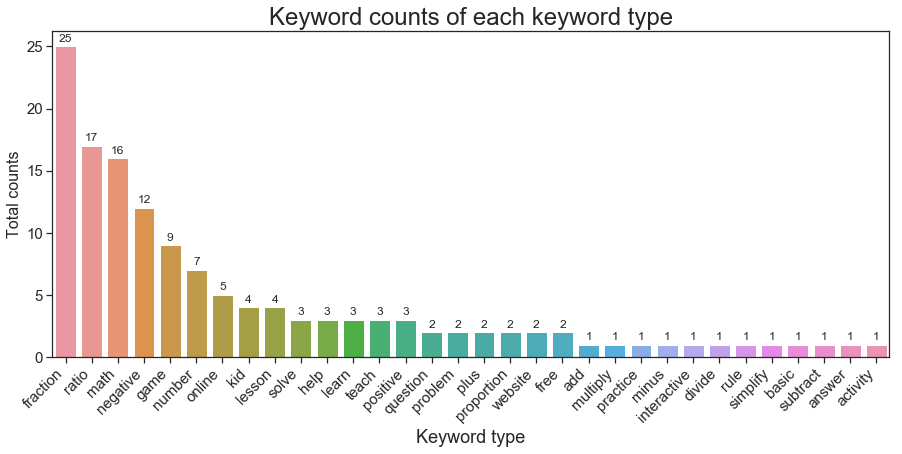

In [191]:
# create df to graph
bar_line_plot = long_df[['kw_type','keyword_counts']]
bar_line_plot = bar_line_plot.sort_values(by='keyword_counts', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='keyword_counts', data=bar_line_plot)


for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', rotation=0, xytext=(0, 3), textcoords='offset points', fontsize=12) 
    
plt.title("Keyword counts of each keyword type", fontsize=24)
ax1.set_ylabel('Total counts', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)


plt.show()

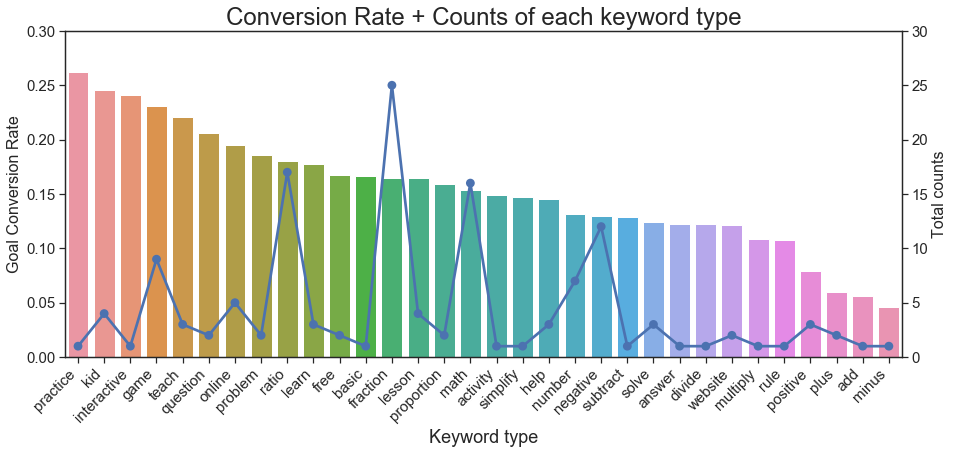

In [192]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'totalConversionRate', 'keyword_counts']]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='keyword_counts', data=bar_line_plot, sort = False)

plt.title("Conversion Rate + Counts of each keyword type", fontsize=24)
ax1.set_ylabel('Goal Conversion Rate', fontsize=16)
ax2.set_ylabel('Total counts', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set(ylim=(0, 0.3))
ax2.set(ylim=(0, 30))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

plt.show()

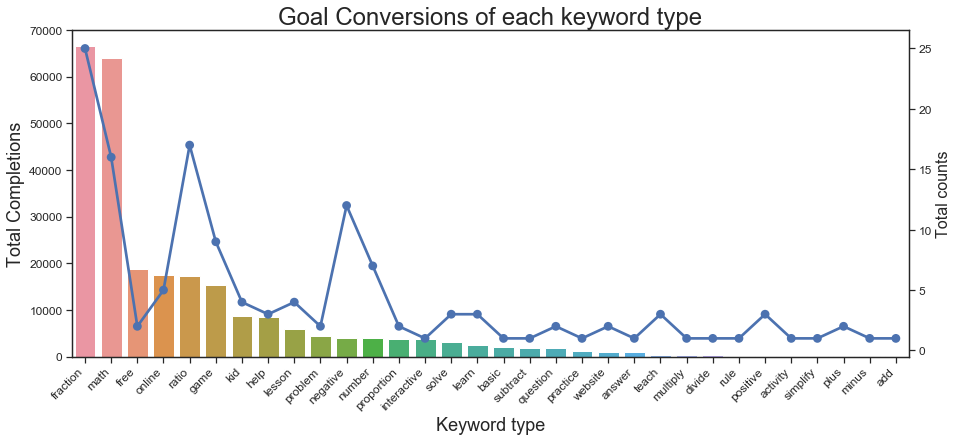

In [193]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'totalCompletions', 'keyword_counts']]
bar_line_plot = bar_line_plot.sort_values(by='totalCompletions', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='totalCompletions', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='keyword_counts', data=bar_line_plot, sort = False)

plt.title("Goal Conversions of each keyword type", fontsize=24)
ax1.set_ylabel('Total Completions', fontsize=18)
ax2.set_ylabel('Total counts', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)



ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

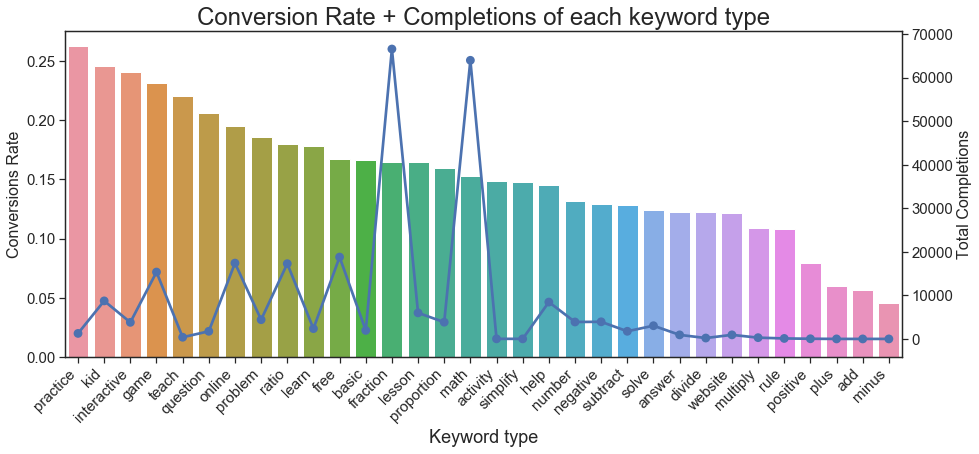

In [194]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'totalConversionRate', 'totalCompletions']]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='totalCompletions', data=bar_line_plot, sort = False)

plt.title("Conversion Rate + Completions of each keyword type", fontsize=24)
ax1.set_ylabel('Conversions Rate', fontsize=16)
ax2.set_ylabel('Total Completions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)



ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

plt.show()

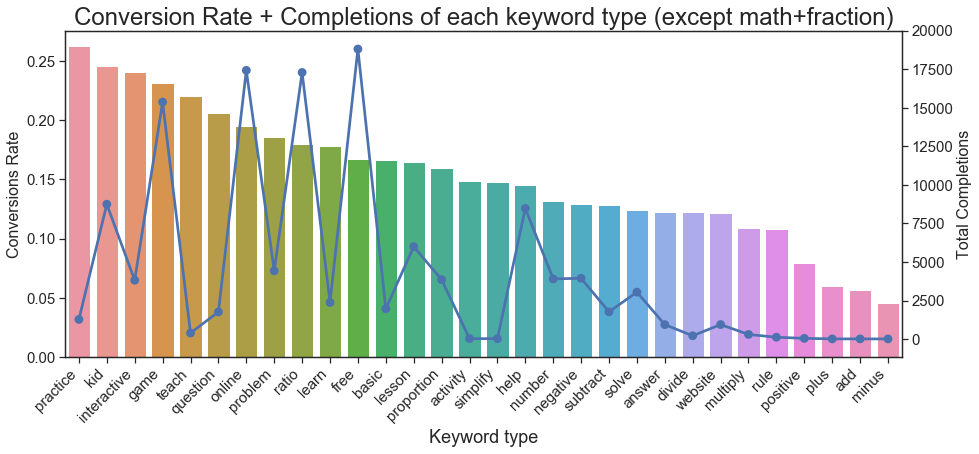

In [195]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'totalConversionRate', 'totalCompletions']]
bar_line_plot = long_df[~long_df['kw_type'].isin(['math', 'fraction'])]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='totalCompletions', data=bar_line_plot, sort = False)

plt.title("Conversion Rate + Completions of each keyword type (except math+fraction)", fontsize=24)
ax1.set_ylabel('Conversions Rate', fontsize=16)
ax2.set_ylabel('Total Completions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

plt.show()

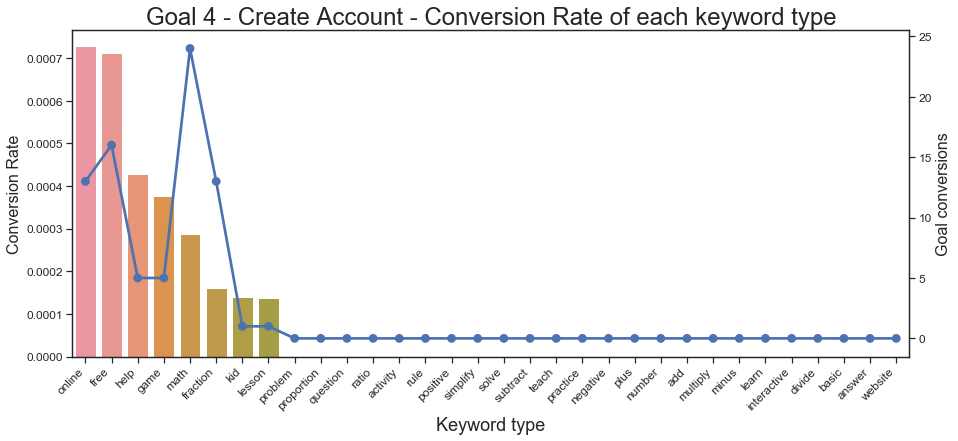

In [196]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'goal4ConversionRate', 'goal4Completions']]
bar_line_plot = bar_line_plot.sort_values(by='goal4ConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='goal4ConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='goal4Completions', data=bar_line_plot, sort = False)

plt.title("Goal 4 - Create Account - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Goal conversions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

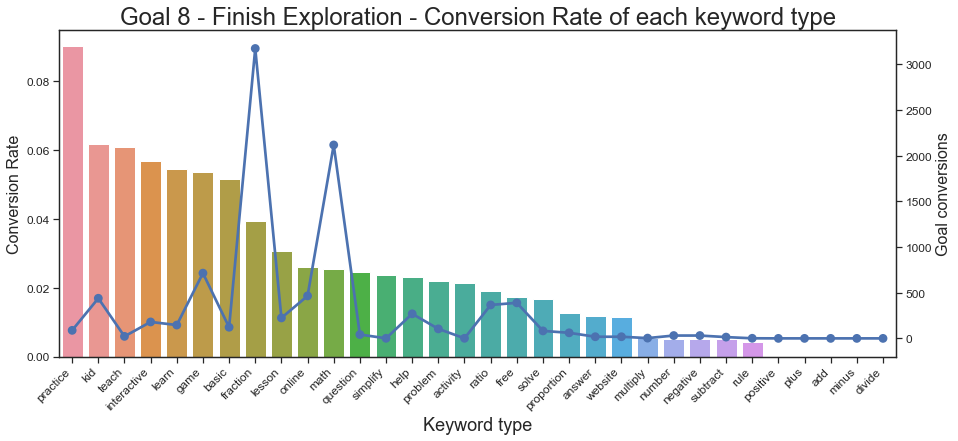

In [197]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'goal8ConversionRate', 'goal8Completions']]
bar_line_plot = bar_line_plot.sort_values(by='goal8ConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='goal8ConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='goal8Completions', data=bar_line_plot, sort = False)

plt.title("Goal 8 - Finish Exploration - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Goal conversions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

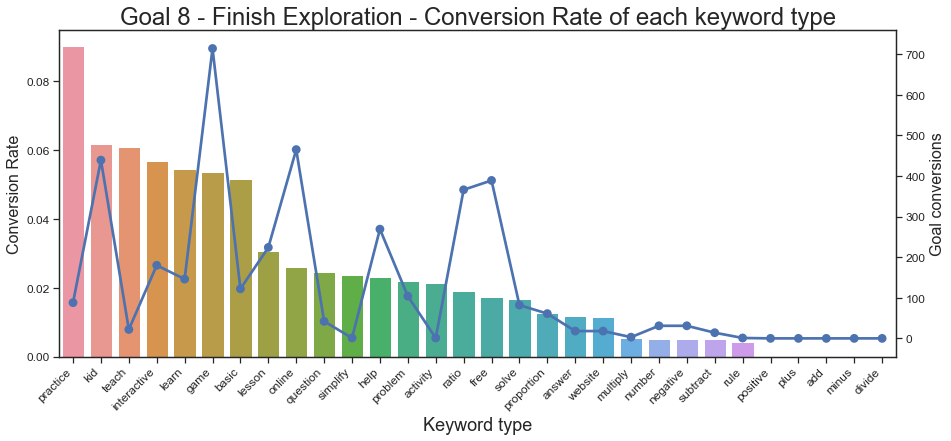

In [198]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'goal8ConversionRate', 'goal8Completions']]
bar_line_plot = long_df[~long_df['kw_type'].isin(['math', 'fraction'])]
bar_line_plot = bar_line_plot.sort_values(by='goal8ConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='goal8ConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='goal8Completions', data=bar_line_plot, sort = False)

plt.title("Goal 8 - Finish Exploration - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Goal conversions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

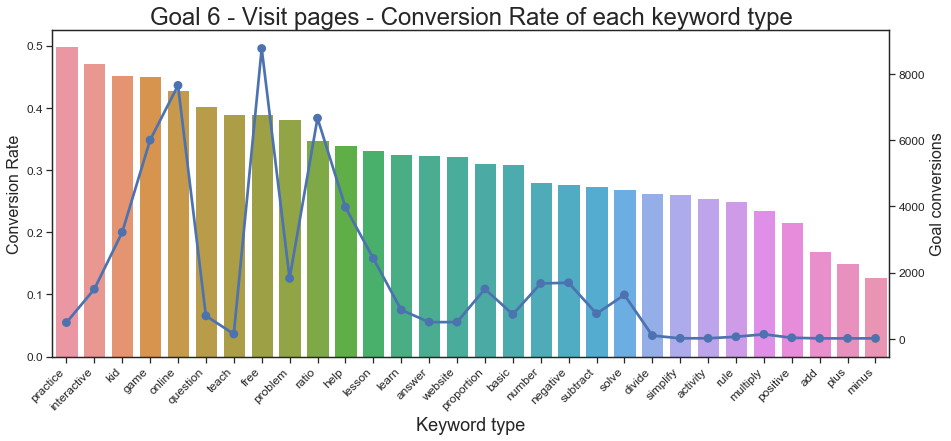

In [199]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'goal6ConversionRate', 'goal6Completions']]
bar_line_plot = long_df[~long_df['kw_type'].isin(['math', 'fraction'])]
bar_line_plot = bar_line_plot.sort_values(by='goal6ConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='goal6ConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='goal6Completions', data=bar_line_plot, sort = False)

plt.title("Goal 6 - Visit pages - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Goal conversions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

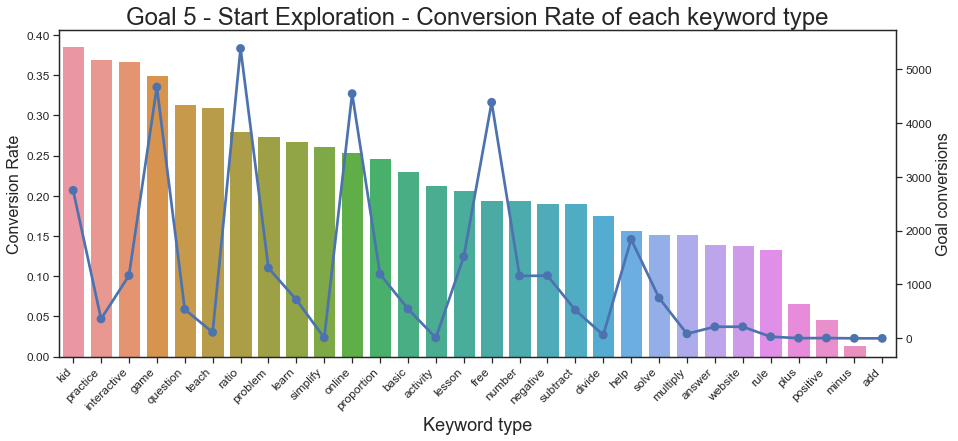

In [200]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'goal5ConversionRate', 'goal5Completions']]
bar_line_plot = long_df[~long_df['kw_type'].isin(['math', 'fraction'])]
bar_line_plot = bar_line_plot.sort_values(by='goal5ConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='goal5ConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='goal5Completions', data=bar_line_plot, sort = False)

plt.title("Goal 5 - Start Exploration - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Goal conversions', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

## Bounce rate

In [201]:
long_df['bounceRate'] = long_df['bounces'] / long_df['sessions']

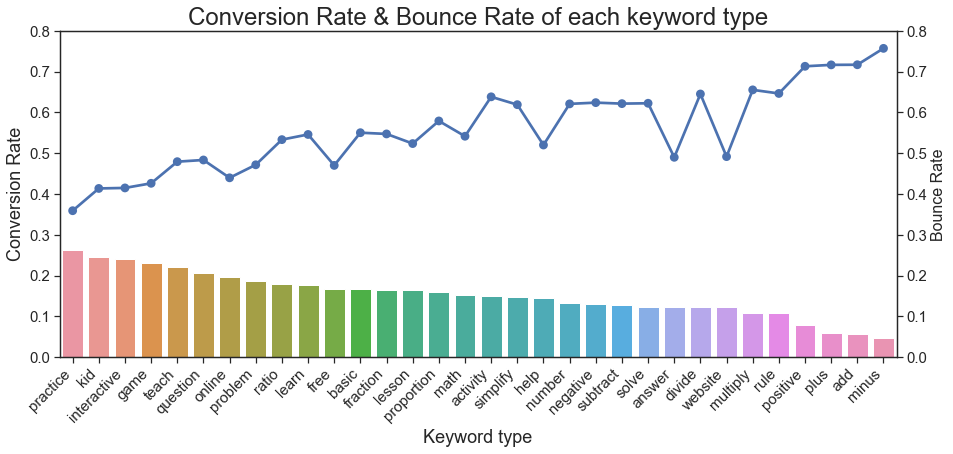

In [202]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'totalConversionRate', 'bounceRate']]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='bounceRate', data=bar_line_plot, sort = False)

plt.title("Conversion Rate & Bounce Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=18)
ax2.set_ylabel('Bounce Rate', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set(ylim=(0, 0.8))
ax2.set(ylim=(0, 0.8))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

plt.show()

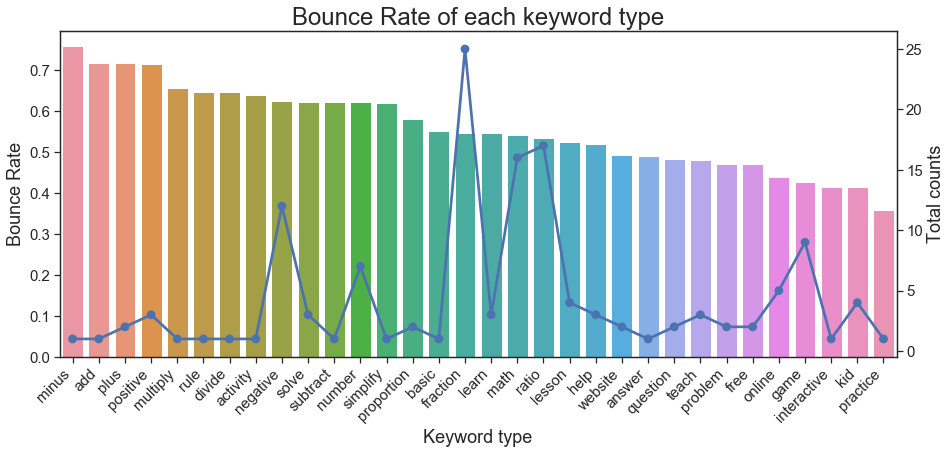

In [203]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'bounceRate', 'keyword_counts']]
bar_line_plot = bar_line_plot.sort_values(by='bounceRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='bounceRate', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='keyword_counts', data=bar_line_plot, sort = False)

plt.title("Bounce Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Bounce Rate', fontsize=18)
ax2.set_ylabel('Total counts', fontsize=18)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

plt.show()

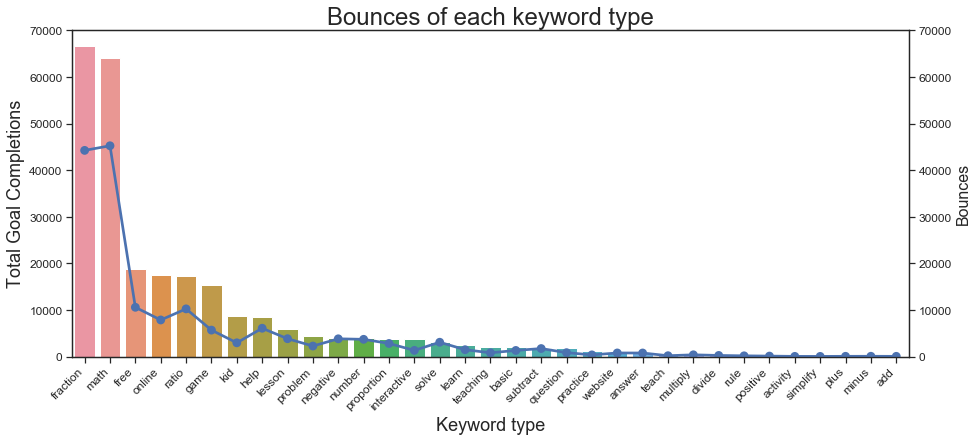

In [151]:
# create df to graph
bar_line_plot = long_df[['kw_type', 'totalCompletions', 'bounces' ]]
bar_line_plot = bar_line_plot.sort_values(by='totalCompletions', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

ax1 = sns.barplot(x='kw_type', y='totalCompletions', data=bar_line_plot)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='bounces', data=bar_line_plot, sort = False)

plt.title("Bounces of each keyword type", fontsize=24)
ax1.set_ylabel('Total Goal Completions', fontsize=18)
ax2.set_ylabel('Bounces', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set(ylim = (0,70000))
ax2.set(ylim = (0,70000))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

## Rank keywords by Conversion Rate

In [204]:
def rank_kw(data, conv_rate, rank_col_name):
    '''
    Input: 
    - data: dataframe to use
    - conv_rate: name of Conversion rate in string (eg: 'goal8ConversionRate')
    - rank_col_name: column name for ranking in string (eg: 'g8_rank')
    
    Output:
    - dataframe with new column displaying rank of keywords
    '''
    df = data[['kw_type', conv_rate]].sort_values(by=conv_rate, ascending=False)
    df.reset_index().drop('index', axis = 1, inplace = True)
    df[rank_col_name] = df[conv_rate].rank()
    return df
    

In [205]:
# create tables with ranks on separate goals
g8_rank = rank_kw(long_df, 'goal8ConversionRate', 'g8_rank')
g7_rank = rank_kw(long_df, 'goal7ConversionRate', 'g7_rank')
g6_rank = rank_kw(long_df, 'goal6ConversionRate', 'g6_rank')
g5_rank = rank_kw(long_df, 'goal5ConversionRate', 'g5_rank')
g4_rank = rank_kw(long_df, 'goal4ConversionRate', 'g4_rank')

# Join these tables
kw_rank = g4_rank.merge(g5_rank, how = 'outer')\
    .merge(g6_rank, how = 'outer')\
    .merge(g7_rank, how = 'outer')\
    .merge(g8_rank, how = 'outer')

#Create rank score col
kw_rank['rank_score'] = (kw_rank['g4_rank'] \
                                + kw_rank['g5_rank']\
                                + kw_rank['g6_rank']\
                                + kw_rank['g7_rank']\
                                + kw_rank['g8_rank'])/5

In [206]:
kw_rank = kw_rank[['kw_type', 'rank_score']].sort_values('rank_score', ascending= False)

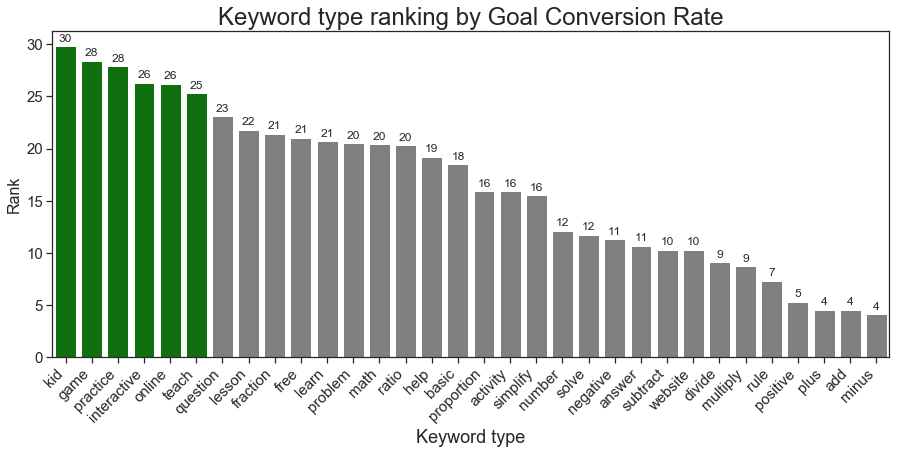

In [207]:
#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

#colors
clrs = []
for x in kw_rank.rank_score:
    if x >25:
        clrs.append('green')
    else:
        clrs.append('gray')
        
#chart
ax1 = sns.barplot(x='kw_type', y='rank_score', data=kw_rank, palette = clrs)


for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', rotation=0, xytext=(0, 3), textcoords='offset points', fontsize=12) 

    
plt.title("Keyword type ranking by Goal Conversion Rate", fontsize=24)
ax1.set_ylabel('Rank', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)


plt.show()

### Rank with bounce rate

In [208]:
bounce_rank = long_df[['kw_type', 'bounceRate']].sort_values(by='bounceRate', ascending=True)
bounce_rank.reset_index().drop('index', axis = 1, inplace = True)
bounce_rank['bounceRateRank'] = bounce_rank['bounceRate'].rank(ascending = False)

# adjust because code has no bounce
bounce_rank = bounce_rank.merge(kw_rank, how = 'outer')

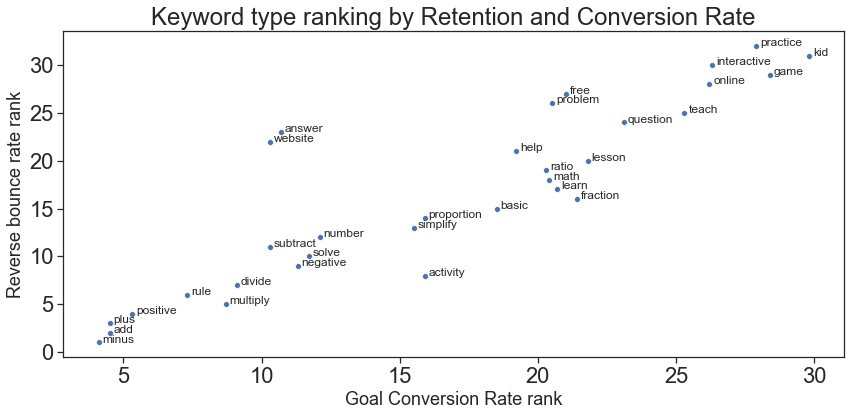

In [209]:
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(14,6))


ax = sns.scatterplot(x="rank_score", y="bounceRateRank", data = bounce_rank)
for i, txt in enumerate(bounce_rank.kw_type):
    plt.annotate(txt, (bounce_rank.rank_score[i], bounce_rank.bounceRateRank[i]), rotation = 0, size = 12, xytext=(4, 0), \
                 textcoords='offset points')

    
plt.title("Keyword type ranking by Retention and Conversion Rate", fontsize=24)
ax.set_ylabel('Reverse bounce rate rank', fontsize=18)
ax.set_xlabel('Goal Conversion Rate rank', fontsize=18)

plt.show()

In [210]:
# Add 2 kind of rank --> produce bounce_cr_rank_score
bounce_cr_rank = bounce_rank.copy()
bounce_cr_rank['bounce_cr_rank_score'] = (bounce_cr_rank['bounceRateRank'] + bounce_cr_rank['rank_score'])/2
bounce_cr_rank = bounce_cr_rank.sort_values('bounce_cr_rank_score', ascending = False)

In [211]:
bounce_cr_rank

,kw_type,bounceRate,bounceRateRank,rank_score,bounce_cr_rank_score
1,kid,0.413560,31.0,29.8,30.40
0,practice,0.358974,32.0,27.9,29.95
3,game,0.426165,29.0,28.4,28.70
2,interactive,0.414826,30.0,26.3,28.15
4,online,0.439637,28.0,26.2,27.10
7,teach,0.479224,25.0,25.3,25.15
5,free,0.470054,27.0,21.0,24.00
8,question,0.483363,24.0,23.1,23.55
6,problem,0.471575,26.0,20.5,23.25
12,lesson,0.523633,20.0,21.8,20.90


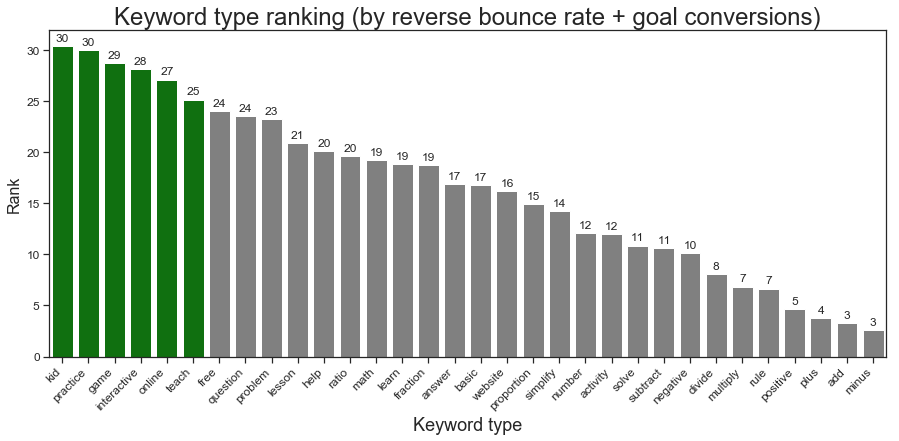

In [213]:
#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

#colors
clrs = []
for x in bounce_cr_rank.bounce_cr_rank_score:
    if x >25:
        clrs.append('green')
    else:
        clrs.append('gray')
        
#chart
ax1 = sns.barplot(x='kw_type', y='bounce_cr_rank_score', data=bounce_cr_rank, palette = clrs)


for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', rotation=0, xytext=(0, 3), textcoords='offset points', fontsize=12) 

    
plt.title("Keyword type ranking (by reverse bounce rate + goal conversions)", fontsize=24)
ax1.set_ylabel('Rank', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)


plt.show()

# Countries specific

In [206]:
countries_df = before_may.copy()

In [ ]:
# Calculae conversion rate
countries_df['goal4ConversionRate'] = countries_df['goal4Completions'] / countries_df['sessions']
countries_df['goal5ConversionRate'] = countries_df['goal5Completions'] / countries_df['sessions']
countries_df['goal6ConversionRate'] = countries_df['goal6Completions'] / countries_df['sessions']
countries_df['goal7ConversionRate'] = countries_df['goal7Completions'] / countries_df['sessions']
countries_df['goal8ConversionRate'] = countries_df['goal8Completions'] / countries_df['sessions']
countries_df['totalConversionRate'] = (countries_df['goal4ConversionRate'] + 
                                     countries_df['goal5ConversionRate'] +
                                     countries_df['goal6ConversionRate'] +
                                     countries_df['goal7ConversionRate'] +
                                     countries_df['goal8ConversionRate']) / 5

countries_df['bounceRate'] = countries_df['bounces'] / countries_df['sessions']


In [207]:
# lemmatize 
countries_df['keyword'] = countries_df['keyword'].str.replace('[^\w\s]','')
countries_df['keyword'] = countries_df['keyword'].str.lower().str.split()

stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
countries_df['keyword'] = countries_df['keyword'].apply(lambda x: [item for item in x if item not in stop])
countries_df['keyword'] = countries_df['keyword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

countries_df

,keyword,country,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces
369,"[fraction, math]",Afghanistan,0,1,1,1,0,1,0
370,"[fraction, math]",Angola,0,1,1,1,0,1,0
371,"[fraction, math]",Antigua & Barbuda,0,1,1,1,0,1,0
372,"[fraction, math]",Argentina,0,0,0,0,0,1,1
373,"[fraction, math]",Armenia,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
6869,"[website, answer, math, problem]",United Kingdom,0,2,7,2,0,25,10
6870,"[website, answer, math, problem]",United States,0,0,0,0,0,3,2
6871,"[website, answer, math, problem]",Vietnam,0,21,42,18,5,133,72
6872,"[website, answer, math, problem]",Zambia,0,0,1,0,0,2,1


In [208]:
# Create columns name in form 'kw_colname'
kw_col_names = []
for item in tokens:
    item = 'kw_' + item
    kw_col_names.append(item)

    
# Create table to match word in keywords 
table = []
for kw in countries_df.keyword:
    row = []
    row.append(kw)
    for word in tokens:
        if word in kw:
            row.append(1)
        else:
            row.append(0)
    table.append(row)

header = ['keyword'] + kw_col_names 
keyword_table = pd.DataFrame(table, columns=header)
            
keyword_table.shape

(4473, 41)

In [209]:
countries_df.keyword

369                     [fraction, math]
370                     [fraction, math]
371                     [fraction, math]
372                     [fraction, math]
373                     [fraction, math]
                      ...               
6869    [website, answer, math, problem]
6870    [website, answer, math, problem]
6871    [website, answer, math, problem]
6872    [website, answer, math, problem]
6873    [website, answer, math, problem]
Name: keyword, Length: 4473, dtype: object

In [210]:
keyword_table

,keyword,kw_activity,kw_add,kw_answer,kw_basic,kw_code,kw_decimal,kw_divide,kw_divided,kw_equivalent,...,kw_question,kw_ratio,kw_rule,kw_simplify,kw_solve,kw_subtract,kw_teach,kw_teaching,kw_time,kw_website
0,"[fraction, math]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[fraction, math]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[fraction, math]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[fraction, math]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[fraction, math]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,"[website, answer, math, problem]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4469,"[website, answer, math, problem]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4470,"[website, answer, math, problem]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4471,"[website, answer, math, problem]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
keyword_table = keyword_table.drop('keyword', axis = 1)

In [201]:
keyword_table.shape

(4473, 40)

In [215]:
# Join df and keyword_table --> keyword_df
countries_df = pd.concat([countries_df.reset_index(),keyword_table.reset_index()], axis = 1)
countries_df.drop(['index'], axis = 1, inplace = True)


In [216]:
countries_df.shape

(4473, 49)

In [204]:
countries_df.columns

Index(['keyword', 'country', 'goal4Completions', 'goal5Completions',
       'goal6Completions', 'goal7Completions', 'goal8Completions', 'sessions',
       'bounces', 'kw_activity', 'kw_add', 'kw_answer', 'kw_basic', 'kw_code',
       'kw_decimal', 'kw_divide', 'kw_divided', 'kw_equivalent', 'kw_fraction',
       'kw_free', 'kw_game', 'kw_help', 'kw_interactive', 'kw_kid', 'kw_learn',
       'kw_learning', 'kw_lesson', 'kw_math', 'kw_minus', 'kw_multiply',
       'kw_negative', 'kw_number', 'kw_online', 'kw_plus', 'kw_positive',
       'kw_practice', 'kw_problem', 'kw_programing', 'kw_proportion',
       'kw_question', 'kw_ratio', 'kw_rule', 'kw_simplify', 'kw_solve',
       'kw_subtract', 'kw_teach', 'kw_teaching', 'kw_time', 'kw_website'],
      dtype='object')

In [219]:
countries_df

,keyword,country,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,kw_activity,...,kw_question,kw_ratio,kw_rule,kw_simplify,kw_solve,kw_subtract,kw_teach,kw_teaching,kw_time,kw_website
0,"[fraction, math]",Afghanistan,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[fraction, math]",Angola,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[fraction, math]",Antigua & Barbuda,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[fraction, math]",Argentina,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"[fraction, math]",Armenia,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,"[website, answer, math, problem]",United Kingdom,0,2,7,2,0,25,10,0,...,0,0,0,0,0,0,0,0,0,1
4469,"[website, answer, math, problem]",United States,0,0,0,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,1
4470,"[website, answer, math, problem]",Vietnam,0,21,42,18,5,133,72,0,...,0,0,0,0,0,0,0,0,0,1
4471,"[website, answer, math, problem]",Zambia,0,0,1,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,1


In [222]:
countries_df.drop(columns = ['keyword'], inplace = True)

In [235]:
for country in countries_df.country[:2]:
    country = countries_df[countries_df['country'] == 'Brazil']
    country = country.drop(columns = ['country'])
    country = country.melt(id_vars=long_df[[col for col in brazil.columns if 'kw_' not in col]], 
                var_name = 'kw_type')

In [236]:
 countries_df.country[:2]

0    Afghanistan
1         Angola
Name: country, dtype: object

In [250]:
dfList  = list(set(countries_df['country']))
dfNames = [row for row in dfList]  

dfs = dict()
for i, row in enumerate(dfList):
    dfName = dfNames[i]
    dfNew = countries_df[countries_df['country'] == row]
    dfs[dfName] = dfNew 

In [254]:
dfs['Brazil']

,country,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,kw_activity,kw_add,...,kw_question,kw_ratio,kw_rule,kw_simplify,kw_solve,kw_subtract,kw_teach,kw_teaching,kw_time,kw_website
11,Brazil,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
102,Brazil,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,Brazil,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,Brazil,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
382,Brazil,0,48,47,44,14,63,8,0,0,...,0,0,0,0,0,0,0,0,0,0
496,Brazil,0,8,8,6,1,15,4,0,0,...,0,0,0,0,0,0,0,0,0,0
617,Brazil,0,0,3,0,0,8,5,0,0,...,0,0,0,0,0,0,0,0,0,0
759,Brazil,0,8,7,7,4,16,5,0,0,...,0,0,0,0,0,0,0,0,0,0
891,Brazil,0,7,7,6,3,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,Brazil,0,3,3,3,0,9,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
def make_country_df(country):
    '''
    Input: country in string
    '''
    df = countries_df[countries_df['country'] == country]
    df = df.drop(columns = ['country'])
    df = df.melt(id_vars=long_df[[col for col in df.columns if 'kw_' not in col]], 
                var_name = 'kw_type')
    df = df[df['value'] == 1]
    df = df.groupby(['kw_type']).sum().reset_index()
    df.drop('value', axis = 1, inplace = True)
    
    # Calculate conversion rate
    df['goal4ConversionRate'] = df['goal4Completions'] / df['sessions']
    df['goal5ConversionRate'] = df['goal5Completions'] / df['sessions']
    df['goal6ConversionRate'] = df['goal6Completions'] / df['sessions']
    df['goal7ConversionRate'] = df['goal7Completions'] / df['sessions']
    df['goal8ConversionRate'] = df['goal8Completions'] / df['sessions']
    df['totalConversionRate'] = (df['goal4ConversionRate'] + 
                                         df['goal5ConversionRate'] +
                                         df['goal6ConversionRate'] +
                                         df['goal7ConversionRate'] +
                                         df['goal8ConversionRate']) / 5
    df['totalCompletions'] = (df['goal4Completions'] + 
                                         df['goal5Completions'] +
                                         df['goal6Completions'] +
                                         df['goal7Completions'] +
                                         df['goal8Completions'])
    df['bounceRate'] = df['bounces'] / df['sessions']
    
    # remove kw_ to have clean axis label 
    df['kw_type'] = df['kw_type'].apply(lambda x: x.replace('kw_', ''))
    
    # filter kw having > 10 sessions
    df = df[df['sessions'] > 10]
    
    return df

In [297]:
philippines = make_country_df('Philippines')
brazil = make_country_df('Brazil')
colombia = make_country_df('Colombia')

In [299]:
colombia

,kw_type,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,goal4ConversionRate,goal5ConversionRate,goal6ConversionRate,goal7ConversionRate,goal8ConversionRate,totalConversionRate,totalCompletions,bounceRate
2,fraction,0,90,94,75,12,240,98,0.0,0.375000,0.391667,0.312500,0.050000,0.225833,271,0.408333
3,free,0,5,12,2,0,18,5,0.0,0.277778,0.666667,0.111111,0.000000,0.211111,19,0.277778
4,game,0,52,58,43,8,116,35,0.0,0.448276,0.500000,0.370690,0.068966,0.277586,161,0.301724
6,interactive,0,23,25,19,5,45,13,0.0,0.511111,0.555556,0.422222,0.111111,0.320000,72,0.288889
7,kid,0,25,24,21,4,56,16,0.0,0.446429,0.428571,0.375000,0.071429,0.264286,74,0.285714
9,lesson,0,3,4,3,0,12,8,0.0,0.250000,0.333333,0.250000,0.000000,0.166667,10,0.666667
10,math,0,32,40,25,1,118,58,0.0,0.271186,0.338983,0.211864,0.008475,0.166102,98,0.491525
11,negative,0,4,5,6,0,14,7,0.0,0.285714,0.357143,0.428571,0.000000,0.214286,15,0.500000
12,number,0,4,5,6,0,14,7,0.0,0.285714,0.357143,0.428571,0.000000,0.214286,15,0.500000
13,online,0,13,23,10,1,31,4,0.0,0.419355,0.741935,0.322581,0.032258,0.303226,47,0.129032


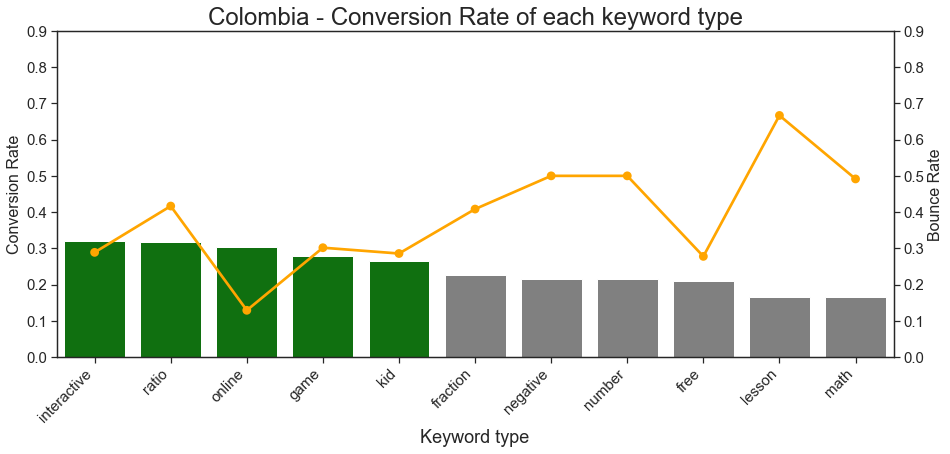

In [324]:
# create df to graph
bar_line_plot = colombia[['kw_type', 'totalConversionRate', 'bounceRate']]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 5)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

#colors
clrs = []
for x in bar_line_plot.totalConversionRate:
    if x >0.25:
        clrs.append('green')
    else:
        clrs.append('gray')

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot, palette = clrs)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='bounceRate', data=bar_line_plot, sort = False, color = 'orange')

plt.title("Colombia - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Bounce Rate', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set(ylim=(0, 0.9))
ax2.set(ylim=(0, 0.9))

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)



plt.show()

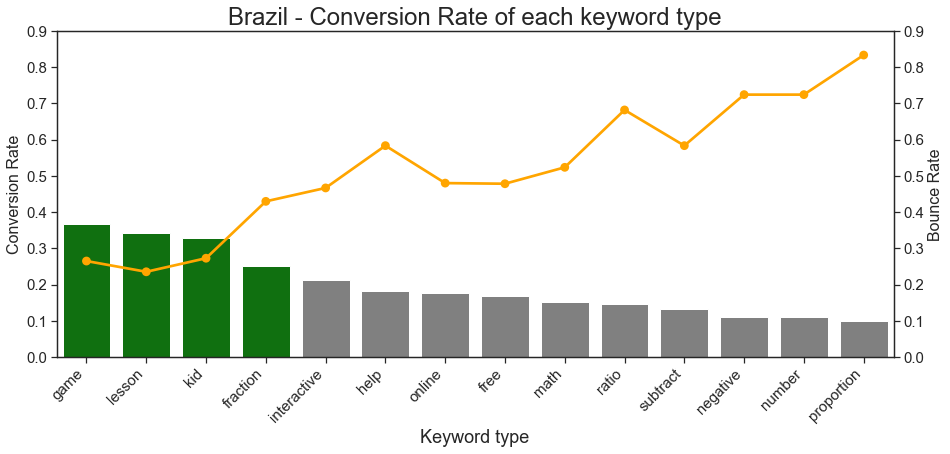

In [325]:
# create df to graph
bar_line_plot = brazil[['kw_type', 'totalConversionRate', 'bounceRate']]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

#colors
clrs = []
for x in bar_line_plot.totalConversionRate:
    if x >0.25:
        clrs.append('green')
    else:
        clrs.append('gray')

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot, palette = clrs)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='bounceRate', data=bar_line_plot, sort = False, color = 'orange')

ax1.set(ylim=(0, 0.9))
ax2.set(ylim=(0, 0.9))

plt.title("Brazil - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Bounce Rate', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

plt.show()

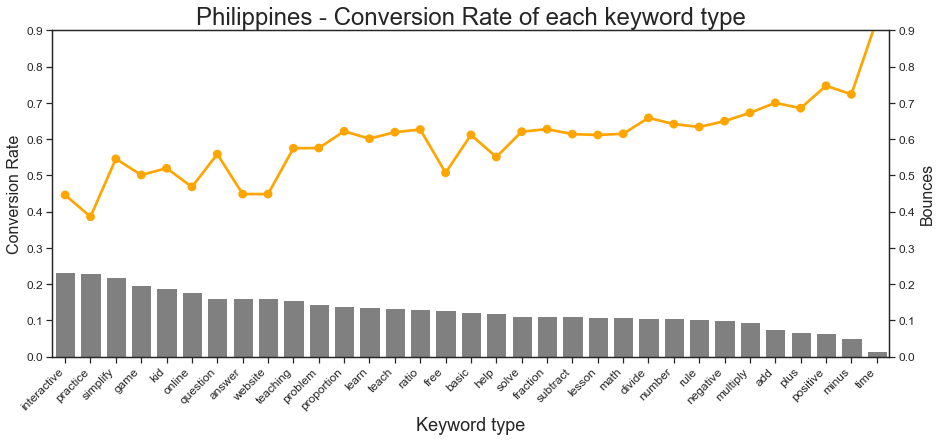

In [326]:
# create df to graph
bar_line_plot = philippines[['kw_type', 'totalConversionRate', 'bounceRate']]
bar_line_plot = bar_line_plot.sort_values(by='totalConversionRate', ascending=False)
bar_line_plot.reset_index().drop('index', axis = 1, inplace = True)

#graph
sns.set(font_scale = 2)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(15,6))

#colors
clrs = []
for x in bar_line_plot.totalConversionRate:
    if x > 0.25:
        clrs.append('green')
    else:
        clrs.append('gray')

ax1 = sns.barplot(x='kw_type', y='totalConversionRate', data=bar_line_plot, palette = clrs)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='kw_type', y='bounceRate', data=bar_line_plot, sort = False, color = 'orange')

plt.title("Philippines - Conversion Rate of each keyword type", fontsize=24)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax2.set_ylabel('Bounces', fontsize=16)
ax1.set_xlabel('Keyword type', fontsize=18)

ax1.set(ylim=(0, 0.9))
ax2.set(ylim=(0, 0.9))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,horizontalalignment='right')
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()

In [296]:
philippines

,kw_type,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,goal4ConversionRate,goal5ConversionRate,goal6ConversionRate,goal7ConversionRate,goal8ConversionRate,totalConversionRate,totalCompletions,bounceRate
1,add,0,0,9,6,0,40,28,0.000000,0.000000,0.225000,0.150000,0.000000,0.075000,15,0.700000
2,answer,0,19,30,17,4,87,39,0.000000,0.218391,0.344828,0.195402,0.045977,0.160920,70,0.448276
3,basic,0,103,202,137,20,757,463,0.000000,0.136063,0.266843,0.180978,0.026420,0.122061,462,0.611625
4,divide,0,15,31,20,0,123,81,0.000000,0.121951,0.252033,0.162602,0.000000,0.107317,66,0.658537
6,fraction,1,1816,4748,2996,266,17773,11150,0.000056,0.102177,0.267147,0.168570,0.014967,0.110583,9827,0.627356
7,free,1,251,808,419,24,2349,1191,0.000426,0.106854,0.343976,0.178374,0.010217,0.127969,1503,0.507024
8,game,0,147,205,158,20,537,269,0.000000,0.273743,0.381750,0.294227,0.037244,0.197393,530,0.500931
9,help,1,274,911,493,37,2848,1568,0.000351,0.096208,0.319874,0.173104,0.012992,0.120506,1716,0.550562
10,interactive,0,24,37,31,5,83,37,0.000000,0.289157,0.445783,0.373494,0.060241,0.233735,97,0.445783
11,kid,0,92,114,76,9,308,160,0.000000,0.298701,0.370130,0.246753,0.029221,0.188961,291,0.519481


# All data

In [65]:
# Calculae conversion rate
before_may['goal4ConversionRate'] = before_may['goal4Completions'] / before_may['sessions']
before_may['goal5ConversionRate'] = before_may['goal5Completions'] / before_may['sessions']
before_may['goal6ConversionRate'] = before_may['goal6Completions'] / before_may['sessions']
before_may['goal7ConversionRate'] = before_may['goal7Completions'] / before_may['sessions']
before_may['goal8ConversionRate'] = before_may['goal8Completions'] / before_may['sessions']
before_may['totalConversionRate'] = (before_may['goal4ConversionRate'] + 
                                     before_may['goal5ConversionRate'] +
                                     before_may['goal6ConversionRate'] +
                                     before_may['goal7ConversionRate'] +
                                     before_may['goal8ConversionRate']) / 5

In [160]:
before_may.keyword.unique()

array(['+fraction +math', '+how +to +simplify +fractions',
       '+math +fractions', 'activities to teach ratios',
       'add negative numbers', 'basic fractions',
       'divide negative numbers', 'equivalent fractions',
       'fraction games', 'fraction games for kids', 'fraction math',
       'fractions for kids', 'fractions lesson', 'fractions to decimals',
       'free math help', 'help with fractions', 'how to do fractions',
       'how to solve fractions', 'how to solve ratio',
       'how to solve ratio questions', 'how to teach fractions',
       'interactive fraction games', 'Learn fractions', 'learn ratios',
       'learn to code game', 'learning websites', 'math fractions',
       'math fractions games', 'Math help fractions', 'math lessons',
       'Math ratios games', 'maths fractions', 'maths lessons',
       'maths online free', 'multiply negative numbers',
       'negative divided by negative', 'negative minus negative',
       'negative numbers', 'negative numbers 

In [7]:
# Add all keywords to list keys
keys = []
pd.Series(before_may.keyword.unique()).apply(lambda x: keys.append(x))
keys[:2]

['+fraction +math', '+how +to +simplify +fractions']

In [8]:
# loop to extract unique words in keywords
'''
INPUT:

OUTPUT: set of unique words in keywords'''
set_unique_key = set() 
test = keys.copy()
for keyword in test:
    keyword = keyword.split(' ')
    for word in keyword:
        word = re.search('[a-zA-z]+', word).group(0)
        word = word.lower()
        set_unique_key.add(word)

In [9]:
# Convert to string to use remove stop word function
string = ' '.join(str(e) for e in set_unique_key)
string

'website that simplify interactive websites practice proportion ratio teaching add minus ratios lessons by answers free questions to code in fractions equivalent a negative game basic learning plus how numbers positive multiply divided solve with subtract learn times problems programing online maths for math and divide games decimals lesson help do activities proportions rules kids teach fraction'

In [38]:
text = string
text_tokens = word_tokenize(text)

tokens = [word for word in text_tokens if not word in stopwords.words()]

lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens] 

print(tokens)
print(len(tokens))

['website', 'simplify', 'interactive', 'website', 'practice', 'proportion', 'ratio', 'teaching', 'add', 'minus', 'ratio', 'lesson', 'answer', 'free', 'question', 'code', 'fraction', 'equivalent', 'negative', 'game', 'basic', 'learning', 'plus', 'number', 'positive', 'multiply', 'divided', 'solve', 'subtract', 'learn', 'time', 'problem', 'programing', 'online', 'math', 'math', 'divide', 'game', 'decimal', 'lesson', 'help', 'activity', 'proportion', 'rule', 'kid', 'teach', 'fraction']
47


In [50]:
import numpy as np
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)
    
tokens = list(unique(tokens))
tokens

['activity',
 'add',
 'answer',
 'basic',
 'code',
 'decimal',
 'divide',
 'divided',
 'equivalent',
 'fraction',
 'free',
 'game',
 'help',
 'interactive',
 'kid',
 'learn',
 'learning',
 'lesson',
 'math',
 'minus',
 'multiply',
 'negative',
 'number',
 'online',
 'plus',
 'positive',
 'practice',
 'problem',
 'programing',
 'proportion',
 'question',
 'ratio',
 'rule',
 'simplify',
 'solve',
 'subtract',
 'teach',
 'teaching',
 'time',
 'website']

learning problem question lesson
teach
math rule solve answer
ratio proportion decimal
positive negative
multiply divide
plus subtract minus
code programing
game kid activity
basic 
time
simplify

In [52]:
df = before_may.copy()

In [53]:
# Create columns name in form 'kw_colname'
kw_col_names = []
for item in tokens:
    item = 'kw_' + item
    kw_col_names.append(item)

    
# Create table to match word in keywords 
table = []
for kw in df.keyword:
    row = []
    row.append(kw)
    for word in tokens:
        if word in kw:
            row.append(1)
        else:
            row.append(0)
    table.append(row)

header = ['keyword'] + kw_col_names 
keyword_table = pd.DataFrame(table, columns=header)
            
keyword_table.shape

(4473, 41)

In [54]:
keyword_table = keyword_table.drop('keyword', axis = 1)

In [55]:
keyword_table.head()

,kw_activity,kw_add,kw_answer,kw_basic,kw_code,kw_decimal,kw_divide,kw_divided,kw_equivalent,kw_fraction,...,kw_question,kw_ratio,kw_rule,kw_simplify,kw_solve,kw_subtract,kw_teach,kw_teaching,kw_time,kw_website
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.head()

,keyword,campaign,country,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,goal4ConversionRate,goal5ConversionRate,goal6ConversionRate,goal7ConversionRate,goal8ConversionRate,totalConversionRate
369,+fraction +math,Targeting Learners,Afghanistan,0,1,1,1,0,1,0,0.0,1.0,1.0,1.0,0.0,0.6
370,+fraction +math,Targeting Learners,Angola,0,1,1,1,0,1,0,0.0,1.0,1.0,1.0,0.0,0.6
371,+fraction +math,Targeting Learners,Antigua & Barbuda,0,1,1,1,0,1,0,0.0,1.0,1.0,1.0,0.0,0.6
372,+fraction +math,Targeting Learners,Argentina,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
373,+fraction +math,Targeting Learners,Armenia,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Join df and keyword_table --> df_b4may
df_b4may = pd.concat([df.reset_index(),keyword_table.reset_index()], axis = 1)
df_b4may.drop(['index'], axis = 1, inplace = True)


In [58]:
df_b4may.shape

(4473, 56)

In [59]:
df_b4may.columns

Index(['keyword', 'campaign', 'country', 'goal4Completions',
       'goal5Completions', 'goal6Completions', 'goal7Completions',
       'goal8Completions', 'sessions', 'bounces', 'goal4ConversionRate',
       'goal5ConversionRate', 'goal6ConversionRate', 'goal7ConversionRate',
       'goal8ConversionRate', 'totalConversionRate', 'kw_activity', 'kw_add',
       'kw_answer', 'kw_basic', 'kw_code', 'kw_decimal', 'kw_divide',
       'kw_divided', 'kw_equivalent', 'kw_fraction', 'kw_free', 'kw_game',
       'kw_help', 'kw_interactive', 'kw_kid', 'kw_learn', 'kw_learning',
       'kw_lesson', 'kw_math', 'kw_minus', 'kw_multiply', 'kw_negative',
       'kw_number', 'kw_online', 'kw_plus', 'kw_positive', 'kw_practice',
       'kw_problem', 'kw_programing', 'kw_proportion', 'kw_question',
       'kw_ratio', 'kw_rule', 'kw_simplify', 'kw_solve', 'kw_subtract',
       'kw_teach', 'kw_teaching', 'kw_time', 'kw_website'],
      dtype='object')

In [60]:
df_b4may.sample(5)

,keyword,campaign,country,goal4Completions,goal5Completions,goal6Completions,goal7Completions,goal8Completions,sessions,bounces,...,kw_question,kw_ratio,kw_rule,kw_simplify,kw_solve,kw_subtract,kw_teach,kw_teaching,kw_time,kw_website
2124,math fractions,Targeting Learners,United States,1,80,164,110,10,858,596,...,0,0,0,0,0,0,0,0,0,0
3541,ratio in math,Targeting Learners,Greece,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
415,fraction games,Targeting Learners,Ireland,0,8,5,5,1,16,6,...,0,0,0,0,0,0,0,0,0,0
2625,maths lessons,Targeting Learners,Singapore,0,1,1,1,0,3,2,...,0,0,0,0,0,0,0,0,0,0
4316,teaching kids fractions,Targeting Learners,Botswana,0,0,2,2,0,7,5,...,0,0,0,0,0,0,1,1,0,0
